In [1]:
import pandas as pd

In [11]:
df_indian.to_csv('small_indian.csv')

In [17]:
df_movies = pd.read_excel('archive/movies.xlsx', sheet_name='tags')
df_movies.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [18]:
df_indian = pd.read_csv('archive/indian_food.csv')
df_indian.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [19]:
df_indian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
name              255 non-null object
ingredients       255 non-null object
diet              255 non-null object
prep_time         255 non-null int64
cook_time         255 non-null int64
flavor_profile    255 non-null object
course            255 non-null object
state             255 non-null object
region            254 non-null object
dtypes: int64(2), object(7)
memory usage: 18.0+ KB


In [21]:
null_row = df_indian[df_indian.region.isnull()]

In [32]:
df_indian.dropna(axis=0).shape

(254, 9)

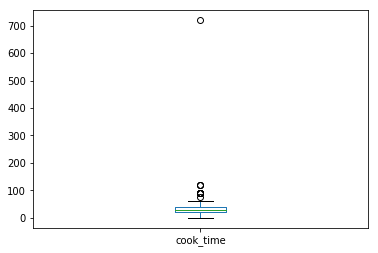

In [35]:
df_indian.cook_time.plot.box()

In [47]:
Q1= df_indian.cook_time.quantile(0.25)
Q3= df_indian.cook_time.quantile(0.75)
IQR = Q3-Q1
limit_up = Q3+1.5*IQR
limit_low = Q1-1.5*IQR
df_indian[(df_indian.cook_time >limit_up)|(df_indian.cook_time<limit_low)]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
27,Malapua,"Yoghurt, refined flour, ghee, fennel seeds",vegetarian,10,120,sweet,dessert,Bihar,North
34,Rasgulla,"Chhena, sugar, cardamom",vegetarian,10,90,sweet,dessert,West Bengal,East
37,Ariselu,"Rice flour, jaggery, ghee",vegetarian,15,75,sweet,dessert,Andhra Pradesh,South
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South
83,Daal baati churma,"Moong dal, masoor dal, chana dal, wheat flour,...",vegetarian,10,90,spicy,main course,Rajasthan,West
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,spicy,snack,-1,South
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,-1,South


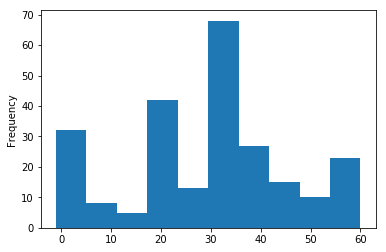

In [51]:
df_indian.cook_time[(df_indian.cook_time <limit_up)&(df_indian.cook_time>limit_low)].plot.hist()

In [59]:
df_left = pd.read_excel('du_lieu_6.xlsx', sheet_name='left')
df_left

,_key1,_key2,city,user_name
0,K0,z0,city_0,user_0
1,K1,z1,city_1,user_1
2,K2,z2,city_2,user_2
3,K3,z3,city_3,user_3


In [60]:
df_right = pd.read_excel('du_lieu_6.xlsx', sheet_name='right')
df_right

,_key1,_key2,hide_date,profession
0,K0,z0,h_0,p_0
1,K1,z1,h_1,p_1
2,K2,z2,h_2,p_2
3,K3,z3,h_3,p_3
4,K4,z4,h_4,p_4
5,K5,z5,h_5,p_5


In [62]:
df_all = pd.concat([df_left, df_right], axis=1, join='outer')
df_all

,_key1,_key2,city,user_name,_key1,_key2,hide_date,profession
0,K0,z0,city_0,user_0,K0,z0,h_0,p_0
1,K1,z1,city_1,user_1,K1,z1,h_1,p_1
2,K2,z2,city_2,user_2,K2,z2,h_2,p_2
3,K3,z3,city_3,user_3,K3,z3,h_3,p_3
4,NaN,NaN,NaN,NaN,K4,z4,h_4,p_4
5,NaN,NaN,NaN,NaN,K5,z5,h_5,p_5


In [65]:
df_merge = df_right.merge(df_left, how='outer')
df_merge

,_key1,_key2,hide_date,profession,city,user_name
0,K0,z0,h_0,p_0,city_0,user_0
1,K1,z1,h_1,p_1,city_1,user_1
2,K2,z2,h_2,p_2,city_2,user_2
3,K3,z3,h_3,p_3,city_3,user_3
4,K4,z4,h_4,p_4,NaN,NaN
5,K5,z5,h_5,p_5,NaN,NaN


In [71]:
df_merge[~df_merge.profession.str.contains('1')]

,_key1,_key2,hide_date,profession,city,user_name
0,K0,z0,h_0,p_0,city_0,user_0
2,K2,z2,h_2,p_2,city_2,user_2
3,K3,z3,h_3,p_3,city_3,user_3
4,K4,z4,h_4,p_4,NaN,NaN
5,K5,z5,h_5,p_5,NaN,NaN


In [88]:
df_merge[~df_merge.profession.str.contains('1')].city.str.extract('([a-z]{0,})')

,0
0,city
2,city
3,city
4,NaN
5,NaN
